## K - Means Clustering

In [1]:
!pip install mglearn

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

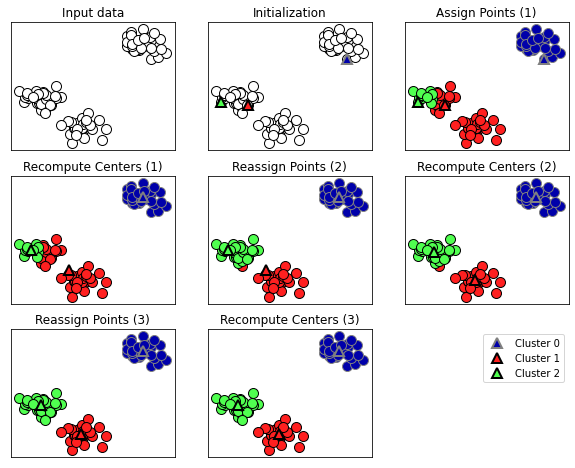

In [3]:
mglearn.plots.plot_kmeans_algorithm()

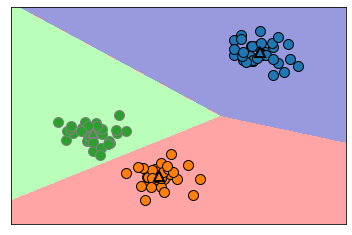

In [4]:
# Boundaries of Cluster Centres

mglearn.plots.plot_kmeans_boundaries()

In [5]:
# K - Means Clustering Algorith at Work

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generating synthetic 2-D data
X, y = make_blobs(random_state=1)

# Building the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Cluster memberships: \n{}".format(kmeans.labels_))

Cluster memberships: 
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [7]:
# Running predict method on the test set (which is actually the training set)

print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


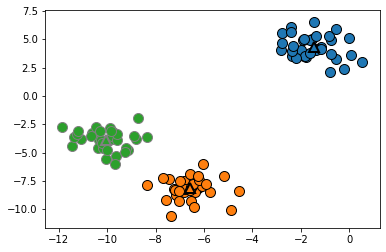

In [8]:
# Plotting the cluster centres and the data points

mglearn.discrete_scatter(X[:, 0], X[: , 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

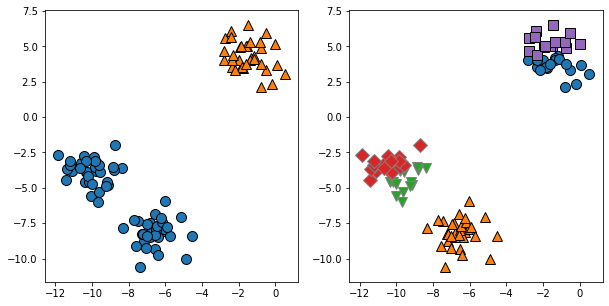

In [9]:
# Using 2 and 5 cluster centres

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Using 2 cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# Using 5 cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### Failure cases of K-Means

Text(0, 0.5, 'Feature 1')

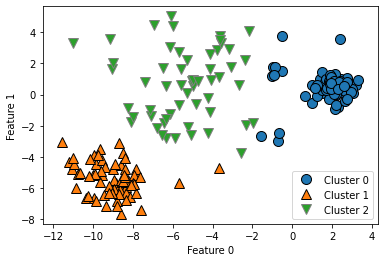

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std = [1.0, 2.5,  0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

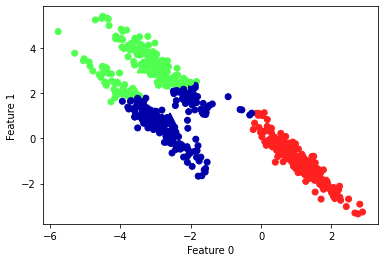

In [11]:
# Generating some random clsuter data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# Transforming the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Clustering the data into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plotting the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

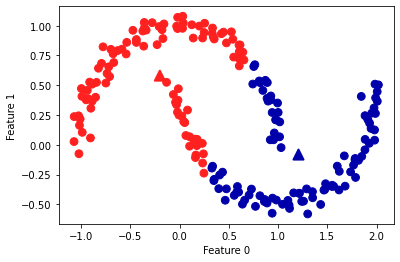

In [12]:
# K-Means on the 2 - moons dataset

from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state=0)

# Clustering the data into 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X, y)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Refer the EigenFaces for Feature Extraction to know more about Vector Quantization and the comparisions between PCA, NMF, and K-Means when used for feature extraction.

## Agglomerative Clustering

Agglomerative Clustering refers to a collection of clustering algorithms that all build upon the same principles of K-Means.

The are several *linkage* criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two existing clusters.

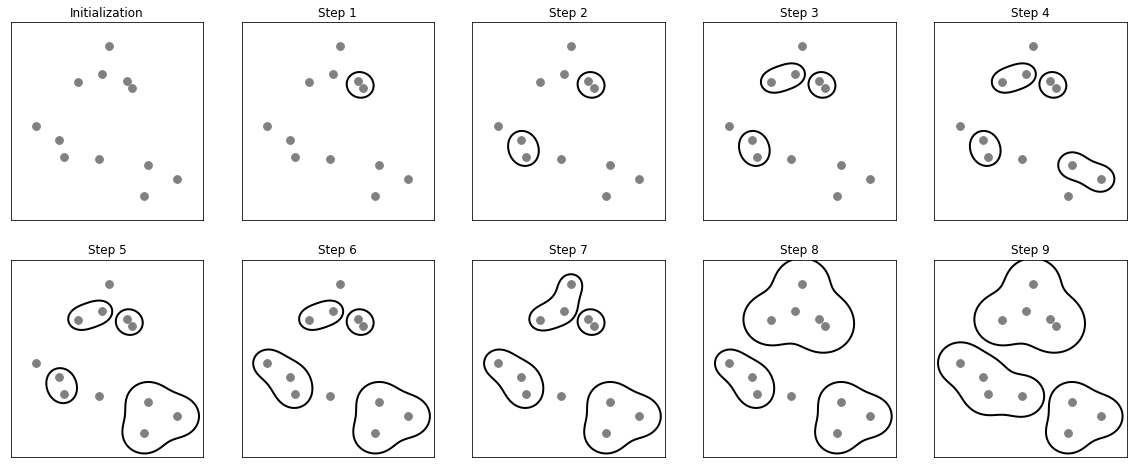

In [13]:
mglearn.plots.plot_agglomerative_algorithm()

One note to remember is that agglomerative clustering has no predict method so it cannot be used for new data.

Text(0, 0.5, 'Feature 1')

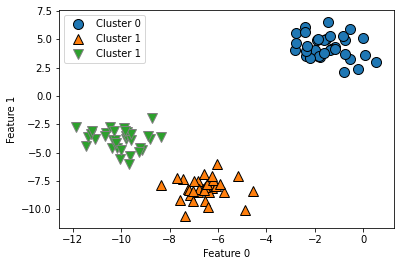

In [14]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 1"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Heirarchical Clustering and Dendrograms

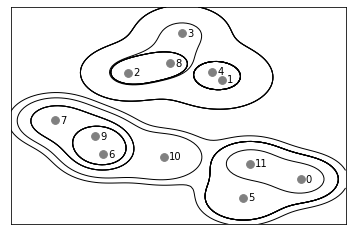

In [15]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster Distance')

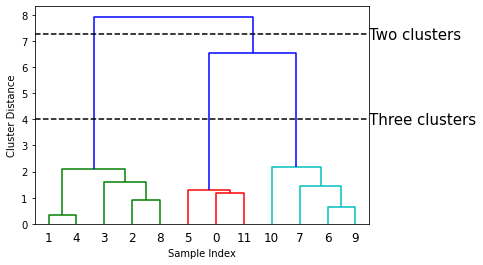

In [16]:
# Importing the dendogram function and the ward function clustering function from Scipy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Applying ward clustering to the data array X
# The Scipy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we will plot the dendogram for the linkage_array containing the distances between clsuters
dendrogram(linkage_array)

# Marking the cuts that signify 2 or 3 clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'Two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'Three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")

## DBSCAN Algorithm

The full form of DBSCAN is "density-based spatial clustering of applications with noise". Main advantage of this is it does not require the user to set the number of clusters beforehand. 

DBSCAN is relatively slower than agglomerative and k-means but can be scaled to larger dataset.

**Read the working of DBSCAN properly**

In [17]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("CLuster memeberships:\n{}".format(clusters))

CLuster memeberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


All the above labels were assigned -1 which stands for noise. This is due to the default parameter settings for the *eps* and *min_samples* which are not tuned for this datasets.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


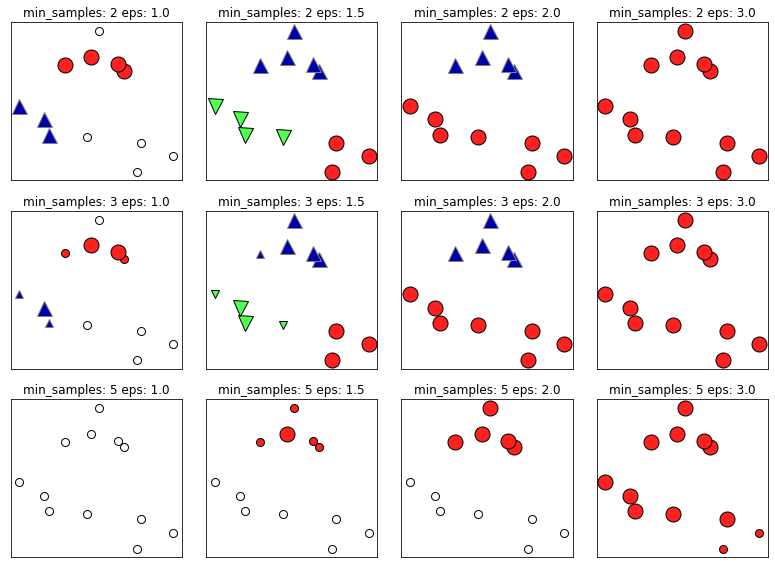

In [18]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

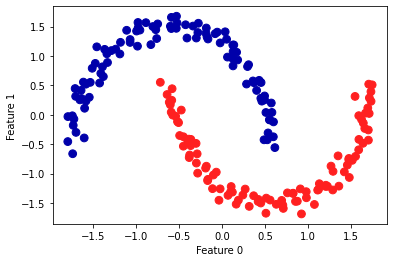

In [19]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescaling the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# Plotting the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Comparing and Evaluating Clustering Algorithms

### Evaluating Clustering with Ground Truth

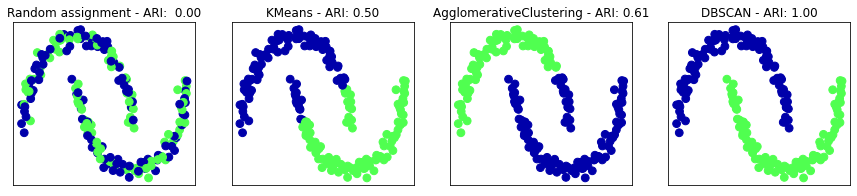

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score, #adjusted_mutual_info_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescaling the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# Making list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# Creating a Random Cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# Plot Random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:  {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  # Plotting the cluster assignments and cluster centers
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap= mglearn.cm3, s=60)
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [28]:
from sklearn.metrics import accuracy_score

# These 2 labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# Accuracy is zero as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# Adjusted Rand Score is 1, as the clustering is exactly the same
print("Adjusted Rand Socre: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
Adjusted Rand Socre: 1.00


### Evaluating clustering without Ground Truth

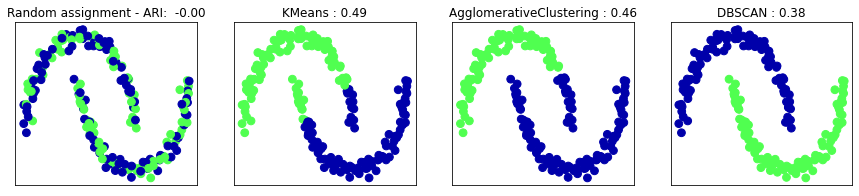

In [31]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescaling the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# Making list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# Creating a Random Cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# Plot Random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:  {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  # Plotting the cluster assignments and cluster centers
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap= mglearn.cm3, s=60)
  ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))